In [646]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

# UCLA Admission Predictor

## Exploratory Data Analysis

In [647]:
dataset = pd.read_csv('Admission_Predict_Ver1.1.csv')
dataset.head() 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [648]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


This tells us that there are no missing values in the dataset which is a plus point for us as we do not need to worry about missing values and what to do with it.

The Serial Number just looks like an index to me and we can remove that column as it wont have any affect on our predictive model.

In [649]:
dataset.drop('Serial No.',axis = 1,inplace = True)
dataset.columns = ['GRE', 'TOEFL', 'University Rating','SOP','LOR','CGPA','Research','Chance of Admit']

Now lets look at what each column indicates in the Dataset.
GRE Score : Tells us about the GRE Score of each person.
TOEFL Score : Tells us about the TOEFL Score of each person.
University Rating : The Rating which the University has given to the Student
SOP : The rating which is given to the Statement of Purpose for the Student
LOR : The rating which is given to the Letter of Recommendation of the Student
CGPA : Tells us about the CGPA of the student in the previous college
Research : Tells us whether the studetn has done research or not
Chance of Admit : Is the probability the student will get into the University considering all the parameters above

Now lets look at the distribution plot of each of this variables and the average score.

### GRE Scores

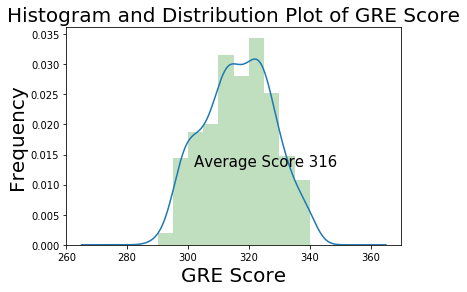

In [650]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = 10,10
dataset['GRE'].plot(kind = 'kde',ax = ax)
dataset['GRE'].plot(kind = 'hist', ax = ax,density = True,color = 'g',alpha = 0.25)
plt.xlabel('GRE Score',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Histogram and Distribution Plot of GRE Score',fontsize = 20)
plt.text(302, 0.013, 'Average Score %d' %(int(np.mean(dataset['GRE']))), fontsize=15)
plt.show()

Now lets look at the distribution of GRE Score for all the students who had changes of admit  > 0.75. This will give us an idea about the GRE Score you need for higher chances

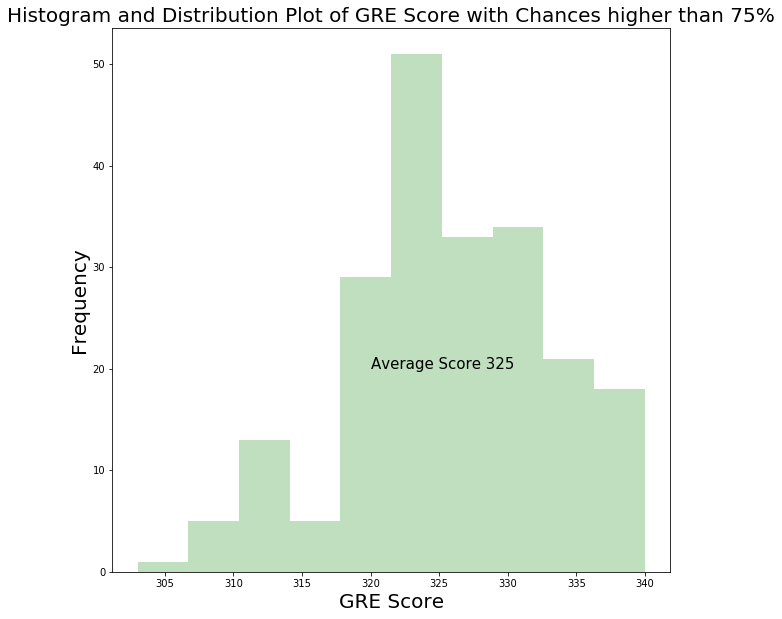

In [651]:
dataset[dataset['Chance of Admit'] > 0.75]['GRE'].plot(kind = 'hist',x = 'GRE',color = 'g',alpha = 0.25)
plt.text(320, 20, 'Average Score %d' %(int(np.mean(dataset[dataset['Chance of Admit'] > 0.75]['GRE']))), fontsize=15)
plt.xlabel('GRE Score',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Histogram and Distribution Plot of GRE Score with Chances higher than 75%',fontsize = 20)
plt.show()

Now we can see that to have a chance of admit just based on GRE Scores we need a score aorund 325+ to have a chance greter than 75%

Now let us see if doing research has some effect on the chances and the average GRE Score than.

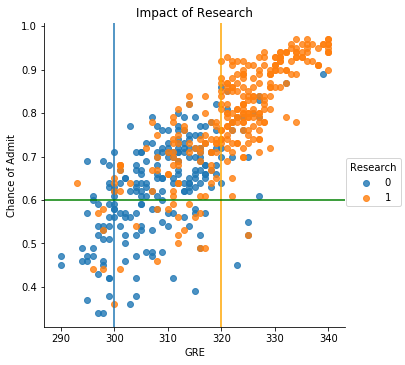

In [652]:
# add SNS plot here with hue = 'Research'
plt.rcParams['figure.figsize'] = 10,20
sns.lmplot(x = 'GRE' , y = 'Chance of Admit',hue = 'Research',data = dataset,fit_reg = False)
plt.axvline(x = 300,ymin = 0,ymax = 1)
plt.axvline(x = 320,ymin = 0,ymax = 1,color = 'orange')
plt.axhline(y = 0.6,color = 'green')
plt.title('Impact of Research')
plt.show()

This tells us that if you have score around 300~320 and you do research you can have a chance higher than 60% to get into the university. You can also see for the higher scores in that range and having research they have more chances of an admit. Also if you do research and you have a more than decent score you have given yourself a good chance.

### TOEFL Scores

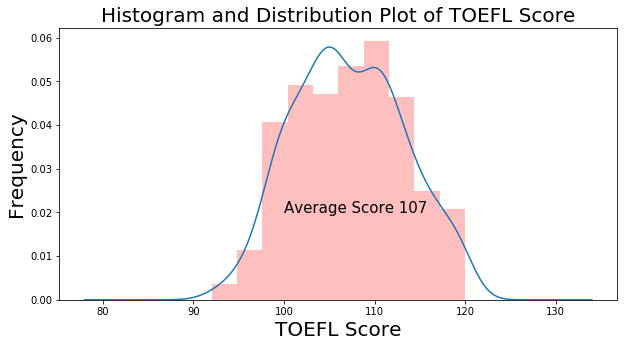

In [654]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = 10,5
dataset['TOEFL'].plot(kind = 'kde',ax = ax)
dataset['TOEFL'].plot(kind = 'hist', ax = ax,density = True,color = 'r',alpha = 0.25)
plt.text(100, 0.02, 'Average Score %d' %(int(np.mean(dataset['TOEFL']))), fontsize=15)
plt.xlabel('TOEFL Score',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Histogram and Distribution Plot of TOEFL Score',fontsize = 20)
plt.show()

So on an average student has a TOEFL score of 107 who applies to this university.

Now lets look at the distribution of TOEFL Score for all the students who had changes of admit  > 0.75. This will give us an idea about the TOEFL Score you need for higher chances

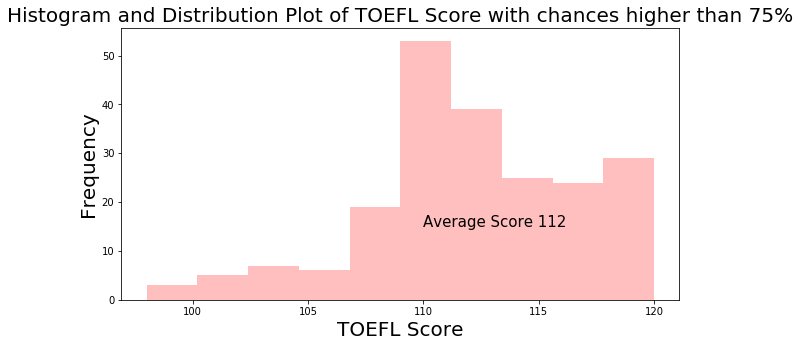

In [655]:
dataset[dataset['Chance of Admit'] > 0.75]['TOEFL'].plot(kind = 'hist',x = 'TOEFL',color = 'r',alpha = 0.25)
plt.text(110, 15, 'Average Score %d' %(int(np.mean(dataset[dataset['Chance of Admit'] > 0.75]['TOEFL']))), fontsize=15)
plt.xlabel('TOEFL Score',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Histogram and Distribution Plot of TOEFL Score with chances higher than 75%',fontsize = 20)
plt.show()

And as you can see we need a score of 112+ to have a admission chance of around 75%

Now let us see if doing research has some effect on the chances and the average TOEFL Score than.

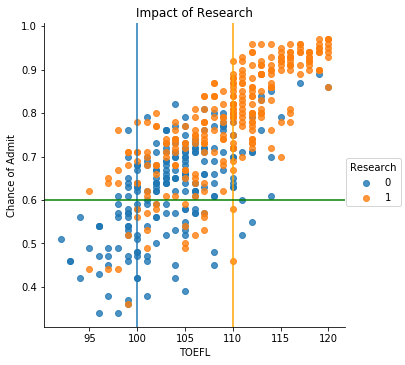

In [656]:
# add SNS plot here with hue = 'Research'
plt.rcParams['figure.figsize'] = 10,20
sns.lmplot(x = 'TOEFL' , y = 'Chance of Admit',hue = 'Research',data = dataset,fit_reg = False)
plt.axvline(x = 100,ymin = 0,ymax = 1)
plt.axvline(x = 110,ymin = 0,ymax = 1,color = 'orange')
plt.axhline(y = 0.6,color = 'green')
plt.title('Impact of Research')
plt.show()

This shows similiar results to GRE score and student will lower TOEFL scores can also increase their chances if they have some research goin on or have done some research.

### University Rating

In [657]:
dataset['University Rating'].unique() # We have 5 different Ratings by the University

array([4, 3, 2, 5, 1], dtype=int64)

We will now look at the distribution of Chance of Admit for each value of University Rating

Text(0.5,1,'Impact of Research')

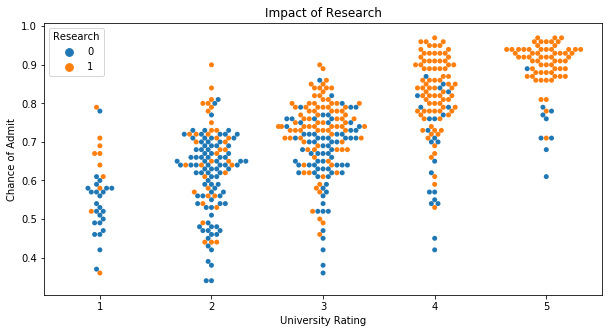

In [658]:
plt.rcParams['figure.figsize'] = 10,5
sns.swarmplot(x = 'University Rating', y = 'Chance of Admit', hue = 'Research',data = dataset)
plt.title('Impact of Research')

This is kind of self explanatory that someone who has done research will have higher chance of admit and a better university rating. It also shows how important it is to do research to get a university rating of 4 or 5. And even in university rating 3 we see that if you have done research you have a higher chance. 

 The presence of rare cases like research is there but still not a good rating is becuase there is some other factor on their profile which is not that good and hence their chances are reduced.

In [659]:
dataset[(dataset['University Rating'] >= 4) & (dataset['Research'] == 1)].sort_values(by = ['Chance of Admit']).head(5)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
492,298,101,4,2.5,4.5,7.69,1,0.53
412,314,102,4,2.5,2.0,7.88,1,0.59
406,322,103,4,3.0,2.5,8.02,1,0.61
115,310,106,4,4.5,4.5,9.04,1,0.66
474,308,105,4,3.0,2.5,7.95,1,0.67


As expected we can see that they have a low score on any other column of their profile.

### CGPA 

Well CGPA is said to be the most important factor in the decision making of a university and lets see how much impact does it have here.

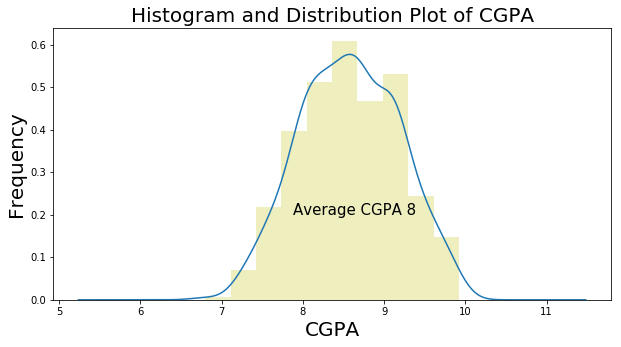

In [660]:
plt.rcParams['figure.figsize'] = 10,5
dataset['CGPA'].plot(kind = 'kde')
dataset['CGPA'].plot(kind = 'hist',density = True,color = 'y',alpha = 0.25)
plt.text(7.88, 0.2, 'Average CGPA %d' %(int(np.mean(dataset['CGPA']))), fontsize=15)
plt.xlabel('CGPA',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Histogram and Distribution Plot of CGPA',fontsize = 20)
plt.show()

WE see that the students who applied at the university had on an average 8 CGPA.

Now lets look at the distribution of CGPA for all the students who had changes of admit  > 0.75. This will give us an idea about the CGPA you need for higher chances

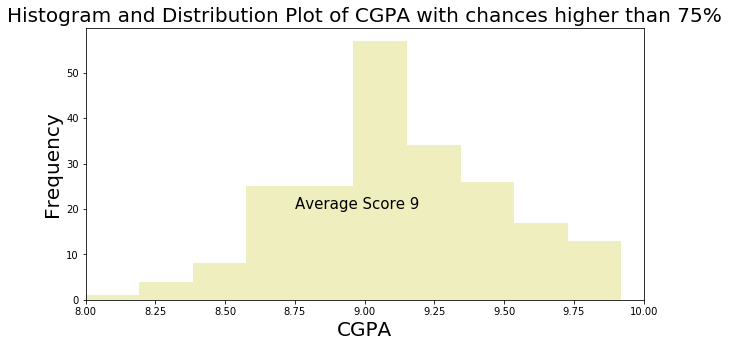

In [661]:
dataset[dataset['Chance of Admit'] > 0.75]['CGPA'].plot(kind = 'hist',x = 'CGPA',color = 'y',alpha = 0.25)
plt.text(8.75, 20, 'Average Score %d' %(int(np.mean(dataset[dataset['Chance of Admit'] > 0.75]['CGPA']))), fontsize=15)
plt.xlabel('CGPA',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.xlim(8,10)
plt.title('Histogram and Distribution Plot of CGPA with chances higher than 75%',fontsize = 20)
plt.show()

So to have a chance of 75% or more we need to have a CGPA of 9+. We can say that the University is very CGPA oriented and this could be a big factor in determining the chance of admission in an university.

Now let us see if doing research has some effect on the chances and the average CGPA Score than.

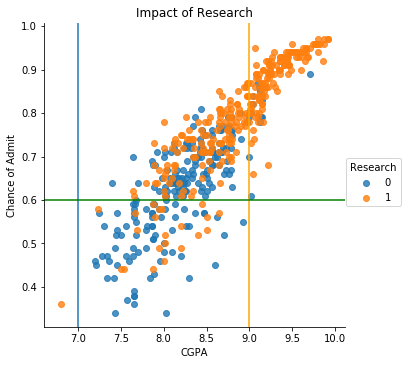

In [662]:
# add SNS plot here with hue = 'Research'
plt.rcParams['figure.figsize'] = 10,20
sns.lmplot(x = 'CGPA' , y = 'Chance of Admit',hue = 'Research',data = dataset,fit_reg = False)
plt.axvline(x = 7,ymin = 0,ymax = 1)
plt.axvline(x = 9,ymin = 0,ymax = 1,color = 'orange')
plt.axhline(y = 0.6,color = 'green')
plt.title('Impact of Research')
plt.show()

Again showing the same thing, if you have done research and have a lower CGPA you still have a higher chance. Though one thing as mentioned above, the university being CGPA centric, higer CGPA continues to have more affect than Research. Another strange thing is that in the higher regions of GRE,TOEFL and CGPA there were many student who has done research and many few who has not. This shows people would better grades tend to do research as well. But Causation does not mean Correlation.

### SOP and LOR

Average SOP : 3
Average LOR : 3


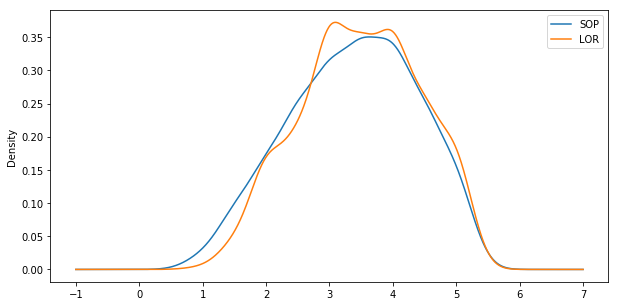

In [675]:
print('Average SOP :', int(np.mean(dataset['SOP'])))
print('Average LOR :', int(np.mean(dataset['LOR'])))
plt.rcParams['figure.figsize'] = 10,5

dataset['SOP'].plot(kind = 'kde')
dataset['LOR'].plot(kind = 'kde')
plt.legend(['SOP','LOR'])
#dataset['CGPA'].plot(kind = 'hist',density = True,color = 'y',alpha = 0.25)

SO we see that on an average they have and LOR and SOP value of 3. There is not much to look into this. But we will look at how research value impact the chances for SOP and LOR.

Text(0.5,1,'Impact of Research')

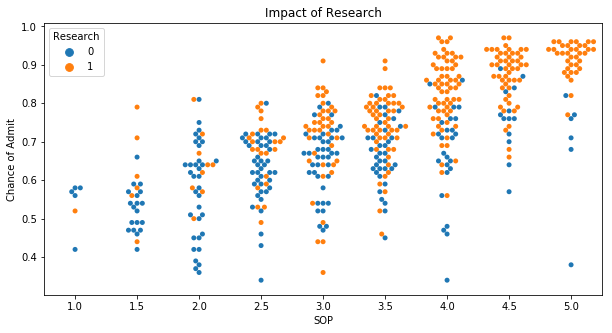

In [676]:
# Swarmplot for SOP and LOR values with hue Reasearch and y Chance of Admit
plt.rcParams['figure.figsize'] = 10,5
sns.swarmplot(x = 'SOP', y = 'Chance of Admit', hue = 'Research',data = dataset)
plt.title('Impact of Research')


A possible explanation for this is that someone who has done research will have lots to write in the SOP and hence will have a better rating for that SOP as they would be able to explain alot of things about their research interests work done by them etc.

Text(0.5,1,'Impact of Research')

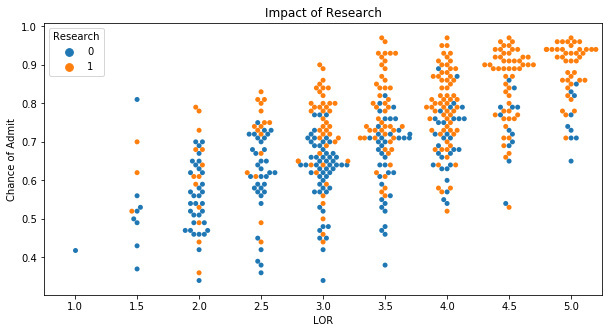

In [18]:
plt.rcParams['figure.figsize'] = 10,5
sns.swarmplot(x = 'LOR', y = 'Chance of Admit', hue = 'Research',data = dataset)
plt.title('Impact of Research')


A similar explantation to the one given above for SOP, someone who has done research will know many professors who would write a good LOR for him/her and so will have a higher rating on LOR.Infact it is not strange to see that for Ratings of SOP and LOR above 4 we have more research students and only a few non-research students. Those exceptional ones would have something really interesting in thei SOPs to get such high scores.

### Correlation of Variables

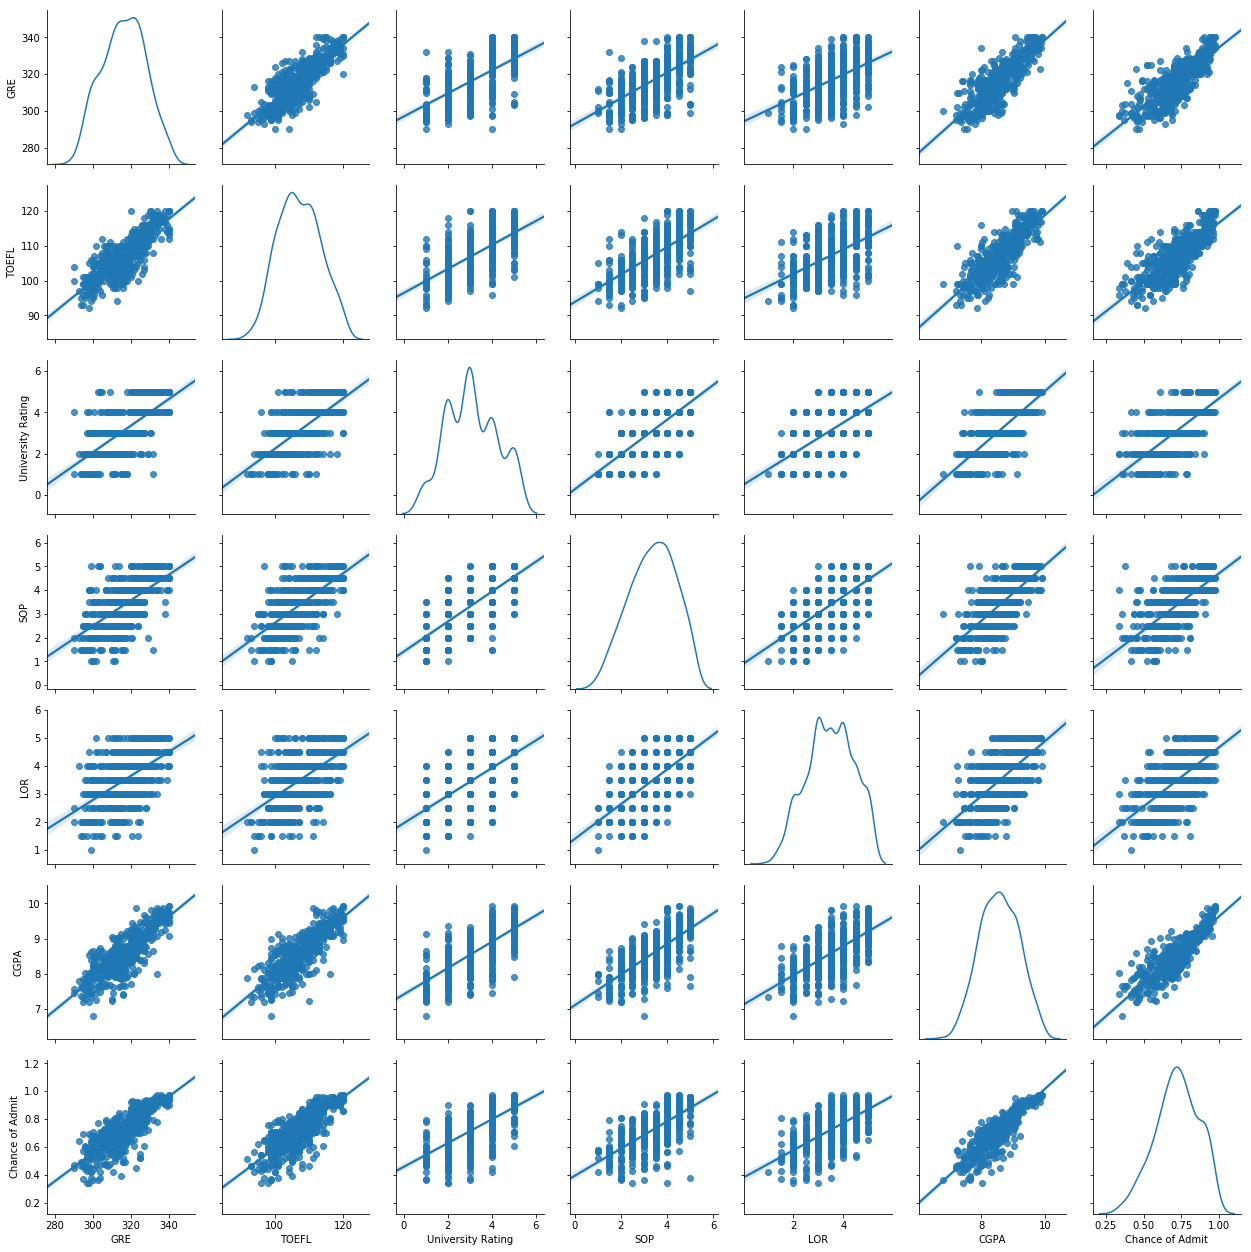

In [677]:
sns.pairplot(dataset,vars = ['GRE','TOEFL','University Rating','SOP','LOR','CGPA','Chance of Admit'],
             kind = 'reg',diag_kind = 'kde',palette="husl")


This shows that almost all the variables has good correlation with each other and a positive relationship to be precise. The all seem to have a positive relation with the Chance of Admit as well. Well enough of exploration now. Lets move to the Prediction part of the dataset

## Regression 

Lets first divide the dataset into train and test models.

In [678]:
#Dividing it into Independent and Dependent Variables

X = dataset.iloc[:,:-1].values # Independent Variables
Y = dataset.iloc[:,7].values # Dependent Variables

### Multiple Linear Regression

#### Splitting the Dataset

In [679]:
#Splitting it into train and test dataset
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2,random_state = 0) 
# Splitting it into 400 train and 100 test data set


#### Training the Model

In [680]:
model_simple = LinearRegression()
model_simple.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Predicitng the outcome

In [681]:
pred = model_simple.predict(test_X)

#### Checking for Accuracy

In [682]:
print('Mean Square Error is: ', mean_squared_error(test_Y,pred))
print('Model Accuracy Score : ',r2_score(test_Y,pred))

Mean Square Error is:  0.004079680034602105
Model Accuracy Score :  0.7664048993199384


#### Residual vs Fitted Curve

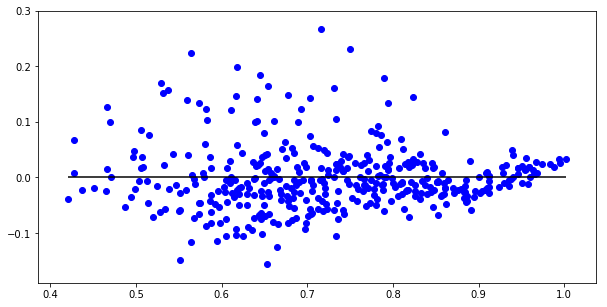

In [683]:
plt.scatter(model_simple.predict(train_X),model_simple.predict(train_X) - train_Y, c = 'b')
plt.hlines(y = 0,xmin = min(model_simple.predict(train_X)),xmax = max(model_simple.predict(train_X)))

We can see that the points are randomly distributed around the line y = 0 and hence we cna say that the assumption of a linear fit on the data is actually true and this model can be used.

### Polynomial Regression

#### Splitting the Dataset

In [684]:
#Splitting it into train and test dataset
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2,random_state = 0) 
# Splitting it into 400 train and 100 test data set

#### Fitting Polynomial to the Dataset

In [685]:
polynomial = PolynomialFeatures(degree = 2)   # Degree 2
polynomial_x = polynomial.fit_transform(train_X)
polynomial.fit(polynomial_x, train_Y)

polynomial_3 = PolynomialFeatures(degree = 3)   # Degree 3
polynomial_x_3 = polynomial_3.fit_transform(train_X)
polynomial_3.fit(polynomial_x_3, train_Y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

#### Training the Model

In [686]:
model_poly = LinearRegression()  # Degree 2
model_poly.fit(polynomial_x,train_Y)

model_poly_3 = LinearRegression() # Degree 3
model_poly_3.fit(polynomial_x_3,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Predicting the outcome

In [687]:
pred_2 = model_poly.predict(polynomial.fit_transform(test_X)) # Degree 2
pred_3 = model_poly_3.predict(polynomial_3.fit_transform(test_X)) # Degree 3

#### Checking for Accuracy

In [688]:
print('Mean Square Error for Polynomial degree 2 is: ', mean_squared_error(test_Y,pred_2))
print('Model Accuracy Score for Polynomial degree 2 is : ',r2_score(test_Y,pred_2))
print('Mean Square Error for Polynomial degree 3 is: ', mean_squared_error(test_Y,pred_3))
print('Model Accuracy Score for Polynomial degree 3 is : ',r2_score(test_Y,pred_3))

Mean Square Error for Polynomial degree 2 is:  0.004624475494589177
Model Accuracy Score for Polynomial degree 2 is :  0.7352108965436563
Mean Square Error for Polynomial degree 3 is:  0.005541232667590122
Model Accuracy Score for Polynomial degree 3 is :  0.6827190387729499


#### Actual vs Predicted

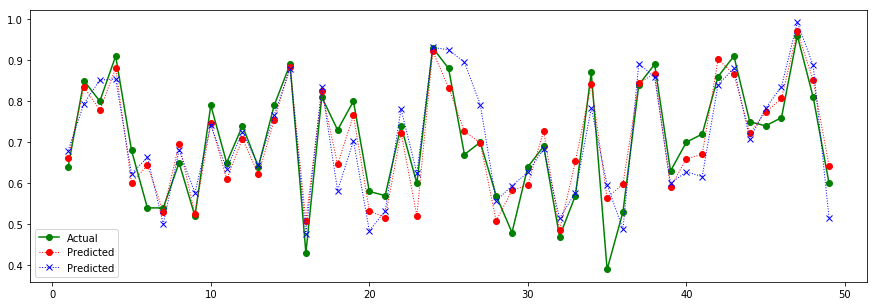

In [689]:
plt.figure(figsize=(15,5))
x = np.arange(1,50)
plt.plot(x,test_Y[:49], '-o', label='Actual',color ='green')
plt.plot(x, pred[:49], ':o', label='Predicted',color = 'red',linewidth = 1)
plt.plot(x, pred_3[:49], ':x', label='Predicted',color = 'blue',linewidth = 1)
plt.legend();

Now we can see that as we increase the degree of the polynomial our mean square error increases and R-squared value decreases. This is because we may be overfitting the data and hence we might be predicting correct values for the training set but not the test set. Since we saw in the Residual vs Fitted value graph for Multiple Linear Regression that Linear assumption for the model is indeed a correct assumption , we would stick to that and assume the model to be linear and hence would perform better with degree 1.

### Support Vector Regression

#### Splitting the Dataset

In [690]:
#Splitting it into train and test dataset
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2,random_state = 0) 
# Splitting it into 400 train and 100 test data set

#### Training the model

In [691]:
model_svr_rbf = SVR(kernel = 'rbf',C = 10,gamma = 0.01) # Gaussian Kernel
model_svr_rbf.fit(train_X,train_Y)

model_svr_linear = SVR(kernel = 'linear', C = 1) #Linear kernel
model_svr_linear.fit(train_X,train_Y)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Predicting Outcome

In [692]:
pred_svr_rbf = model_svr_rbf.predict(test_X)
pred_svr_linear = model_svr_linear.predict(test_X)

#### Checking for Accuracy

In [693]:
print('Mean Square Error for Gaussian(Radial) kernel is: ', mean_squared_error(test_Y,pred_svr_rbf))
print('Model Accuracy Score for Gaussian(Radial) kernel is : ',r2_score(test_Y,pred_svr_rbf))
print('Mean Square Error for Linear kernel is: ', mean_squared_error(test_Y,pred_svr_linear))
print('Model Accuracy Score for Linear kernel is : ',r2_score(test_Y,pred_svr_linear))

Mean Square Error for Gaussian(Radial) kernel is:  0.00477390915910989
Model Accuracy Score for Gaussian(Radial) kernel is :  0.7266545951639795
Mean Square Error for Linear kernel is:  0.004670364441435455
Model Accuracy Score for Linear kernel is :  0.732583378437398


#### Actual and Predicted

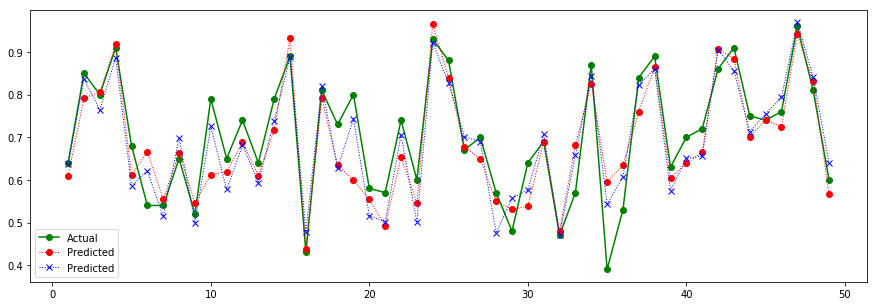

In [694]:
plt.figure(figsize=(15,5))
x = np.arange(1,50)
plt.plot(x,test_Y[:49], '-o', label='Actual',color ='green')
plt.plot(x, pred_svr_rbf[:49], ':o', label='Predicted',color = 'red',linewidth = 1)
plt.plot(x, pred_svr_linear[:49], ':x', label='Predicted',color = 'blue',linewidth = 1)
plt.legend();

As we know this is a linear dataset we expect the linear kernel to give a better result then the gaussia kernel. But by tweaking the parameters of the guassian kernel we are able to get a model that gives a similar result like the linear kernel. That being said we still have the Multiple Linear Regression as the best model till now.

### Decision Tree Regression

#### Splitting the Dataset

In [695]:
#Splitting it into train and test dataset
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2,random_state = 0) 
# Splitting it into 400 train and 100 test data set

#### Training the Dataset

In [696]:
model_dtree = DecisionTreeRegressor(random_state = 0,max_depth = 5,max_features = 5,min_samples_split = 10)
model_dtree.fit(train_X,train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=5,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

#### Predicting Outcome

In [697]:
pred_dtree = model_dtree.predict(test_X)

#### Checking for Accuracy

In [698]:
print('Mean Square Error : ', mean_squared_error(test_Y,pred_dtree))
print('Model Accuracy Score : ',r2_score(test_Y,pred_dtree))

Mean Square Error :  0.004442243087821191
Model Accuracy Score :  0.7456451945878876


#### Actual and Predicted

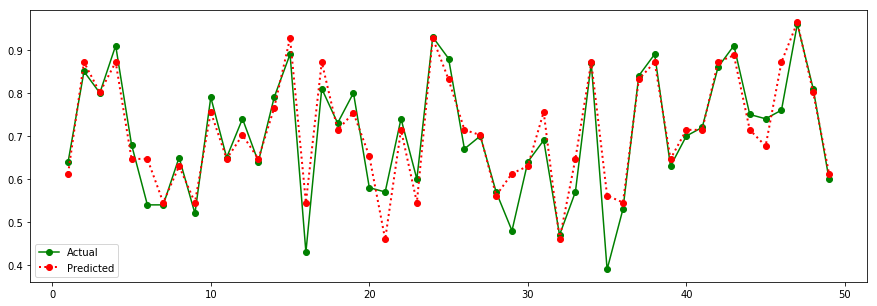

In [699]:
plt.figure(figsize=(15,5))
x = np.arange(1,50)
plt.plot(x,test_Y[:49], '-o', label='Actual',color ='green')
plt.plot(x, pred_dtree[:49], ':o', label='Predicted',color = 'red',linewidth = 2)
plt.legend();

### RandomForestRegression

#### Splitting the Dataset

In [700]:
#Splitting it into train and test dataset
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2,random_state = 0) 
# Splitting it into 400 train and 100 test data set

#### Training the Dataset

In [701]:
model_rforest = RandomForestRegressor(n_estimators = 500,random_state = 0,max_depth = 7
                                      ,max_features = 5,min_samples_split = 10)
model_rforest.fit(train_X,train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

#### Predicting the Outcome

In [702]:
pred_rforest = model_rforest.predict(test_X)

#### Checking for Accuracy

In [703]:
print('Mean Square Error : ', mean_squared_error(test_Y,pred_rforest))
print('Model Accuracy Score : ',r2_score(test_Y,pred_rforest))

Mean Square Error :  0.003925573553076387
Model Accuracy Score :  0.7752287577505326


#### Actual and Predicted

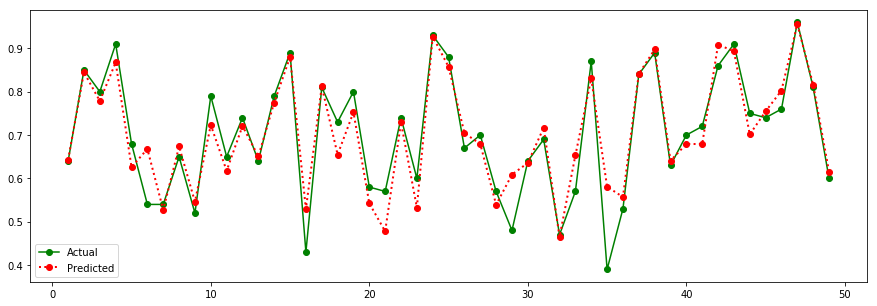

In [704]:
plt.figure(figsize=(15,5))
x = np.arange(1,50)
plt.plot(x,test_Y[:49], '-o', label='Actual',color ='green')
plt.plot(x, pred_rforest[:49], ':o', label='Predicted',color = 'red',linewidth = 2)
plt.legend();

So we finally got a model that predicts better than the Linear Regression used above. And it RandomForest has been the best algorithm till now.

### Principal Component Regression

We will try to fit the model with less number of independent variables using Principal Components Analysis by setting up a threshold of the variance we want and then using that number ot train our model.

#### Splitting the Dataset

In [705]:
#Splitting it into train and test dataset
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2,random_state = 0) 
# Splitting it into 400 train and 100 test data set

#### Finding the Principal Components

In [707]:
pca = PCA(n_components = None)
train_X_pca = pca.fit_transform(train_X)
test_X_pca = pca.fit(test_X)
explained_variance = pca.explained_variance_ratio_


In [708]:
for x in explained_variance:
    print(round(x,2))

0.94
0.05
0.01
0.0
0.0
0.0
0.0


As we can the variance explained by the first two components is enough and the other components can be ignored. Now using this components to create the new linear regression model

#### Training the Model

In [709]:
pca = PCA(n_components = 2)
train_X_pca = pca.fit_transform(train_X)
test_X_pca = pca.transform(test_X)
model_simple_pca = LinearRegression()
model_simple_pca.fit(train_X_pca,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Predicting the Outcome

In [710]:
pred_pca = model_simple_pca.predict(test_X_pca)

#### Checking for Accuracy

In [711]:
print('Mean Square Error : ', mean_squared_error(test_Y,pred_pca))
print('Model Accuracy Score : ',r2_score(test_Y,pred_pca))

Mean Square Error :  0.006134178220163307
Model Accuracy Score :  0.6487680487746285


So this does not perform as good as the Linear Regression model.

#### Predicted and Actual

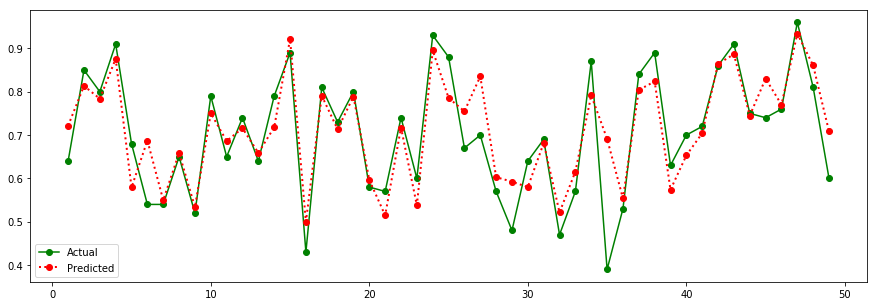

In [712]:
plt.figure(figsize=(15,5))
x = np.arange(1,50)
plt.plot(x,test_Y[:49], '-o', label='Actual',color ='green')
plt.plot(x, pred_pca[:49], ':o', label='Predicted',color = 'red',linewidth = 2)
plt.legend();

### K Nearest Neighbor Regressor

#### Splitting the Dataset

In [713]:
#Splitting it into train and test dataset
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2,random_state = 0) 
# Splitting it into 400 train and 100 test data set

#### Training the Model

In [715]:
model_knn = KNeighborsRegressor(n_neighbors = 10, metric = 'minkowski' , p = 2)
model_knn.fit(train_X,train_Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

#### Predicting the Outcome

In [716]:
pred_knn = model_knn.predict(test_X)

#### Checking for Accuracy

In [717]:
print('Mean Square Error : ', mean_squared_error(test_Y,pred_knn))
print('Model Accuracy Score : ',r2_score(test_Y,pred_knn))

Mean Square Error :  0.004788790000000001
Model Accuracy Score :  0.7258025451266121


#### Actual vs Predicted

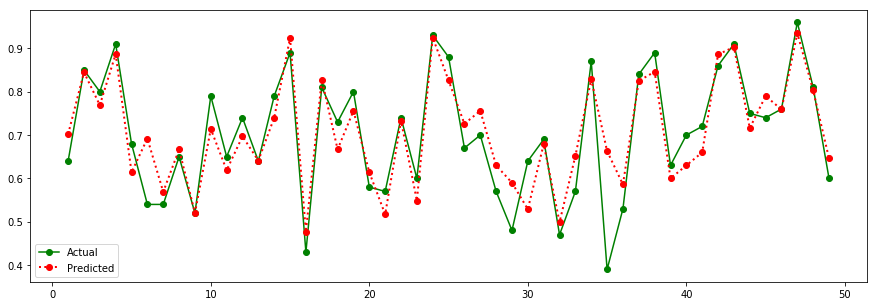

In [718]:
plt.figure(figsize=(15,5))
x = np.arange(1,50)
plt.plot(x,test_Y[:49], '-o', label='Actual',color ='green')
plt.plot(x, pred_knn[:49], ':o', label='Predicted',color = 'red',linewidth = 2)
plt.legend();

So that is the end of the Regression model and let us now look at how each model has performed.

In [720]:
index = ['Linear','Polynomial_2','Polynomial_3','SupportVectorGuassin','SupportVectorLinear',
         'DecisionTree','RandomForest','PCR','KNearest']
mse = [[mean_squared_error(test_Y,pred),r2_score(test_Y,pred)],
       [mean_squared_error(test_Y,pred_2),r2_score(test_Y,pred_2)],
       [mean_squared_error(test_Y,pred_3),r2_score(test_Y,pred_3)],
       [mean_squared_error(test_Y,pred_svr_rbf),r2_score(test_Y,pred_svr_rbf)],
       [mean_squared_error(test_Y,pred_svr_linear),r2_score(test_Y,pred_svr_linear)],
       [mean_squared_error(test_Y,pred_dtree),r2_score(test_Y,pred_dtree)],
       [mean_squared_error(test_Y,pred_rforest),r2_score(test_Y,pred_rforest)],
       [mean_squared_error(test_Y,pred_pca),r2_score(test_Y,pred_pca)],
       [mean_squared_error(test_Y,pred_knn),r2_score(test_Y,pred_knn)]]
data = pd.DataFrame(data = mse,index = index)
data.columns = ['MSE','Accuracy']
data.sort_values(by = 'Accuracy',ascending = False)


,MSE,Accuracy
RandomForest,0.003926,0.775229
Linear,0.004080,0.766405
DecisionTree,0.004442,0.745645
Polynomial_2,0.004624,0.735211
SupportVectorLinear,0.004670,0.732583
SupportVectorGuassin,0.004774,0.726655
KNearest,0.004789,0.725803
Polynomial_3,0.005541,0.682719
PCR,0.006134,0.648768


So this is the performance of all the models that I created. 

Since we now got the best model lets try Cross validation and see if we can improve the model further

In [727]:
cv = cross_val_score(estimator = model_rforest,X = X,y = Y,cv = 10)  # 10 parts

#### Checking for different Accuracy

In [728]:
for accuracy in cv:
    print(accuracy)    

0.7640403895567975
0.6018928034716455
0.78080805950688
0.7148454121686716
0.8917250404408517
0.8654859281854175
0.7915925241667745
0.8046769358828578
0.9045796468592764
0.8409027516766051


In [729]:
print('Accuracy mean:',cv.mean())
print('Accuracy Standard Deviation:',cv.std())

Accuracy mean: 0.7960549491915778
Accuracy Standard Deviation: 0.0856784347981478


We can see that we are further able to increase the accuracy of the model by using the cross validation approach and taking the value of k as 10 meaning dividing the dataset into 10 parts using 9 to train the model and 1 to test the model.